In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
#Accessing the NC file
data=xr.open_dataset(r"C:\Users\ratho\Downloads\20230101023227-NCEI-L3C_GHRSST-SSTskin-AVHRR_Pathfinder-PFV5.3_NOAA19_G_2023001_night-v02.0-fv01.0.nc",decode_times=False)
data

<xarray.Dataset>
Dimensions:                    (time: 1, lat: 4320, lon: 8640, nv: 2)
Coordinates:
  * lat                        (lat) float32 89.98 89.94 89.9 ... -89.94 -89.98
  * lon                        (lon) float32 -180.0 -179.9 ... 179.9 180.0
  * time                       (time) int32 1325385147
Dimensions without coordinates: nv
Data variables: (12/15)
    aerosol_dynamic_indicator  (time, lat, lon) float32 ...
    crs                        int32 ...
    dt_analysis                (time, lat, lon) float32 ...
    l2p_flags                  (time, lat, lon) float64 ...
    lat_bounds                 (lat, nv) float32 ...
    lon_bounds                 (lon, nv) float32 ...
    ...                         ...
    sea_surface_temperature    (time, lat, lon) float32 ...
    sses_bias                  (time, lat, lon) float32 ...
    sses_standard_deviation    (time, lat, lon) float32 ...
    sst_dtime                  (time, lat, lon) float64 ...
    time_bounds                (time, nv) int32 ...
    wind_speed                 (time, lat, lon) float64 ...
Attributes: (12/74)
    Conventions:                             CF-1.6, ACDD-1.3
    title:                                   AVHRR Pathfinder Version 5.3 L3-...
    summary:                                 This netCDF-4 file contains sea ...
    references:                              http://pathfinder.nodc.noaa.gov ...
    institution:                             NCEI
    history:                                 smigen_both ifile=2023001.b4kd1-...
    ...                                      ...
    cdm_data_type:                           Grid
    ncei_template_version:                   NCEI_NetCDF_Grid_Template_v2.0
    program:                                 NOAA Climate Data Record (CDR) P...
    cdr_program:                             NOAA Climate Data Record Program...
    cdr_variable:                            sea_surface_temperature
    cdr_id:                                  gov.noaa.ncdc:C00983

In [3]:
def PlotMap(data,year=None):
    # Create a figure and axis for the plot
    fig, ax = plt.subplots()

    # Create a colormap
    cmap = plt.get_cmap('BrBG')  # You can choose any other colormap you prefer

    # Determine the appropriate color limits based on your data
    vmin = data.min()  # Minimum value for the color scale
    vmax = data.max()  # Maximum value for the color scale

    # Plot the average yearly rainfall data using the colormap
    im = ax.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax)
#                    extent=[data['lon'].min(), data['lon'].max(),
#                            data['lat'].min(), data['lat'].max()])

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, label='Rainfall')

    # Set axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'Average Yearly Rainfall Data of {year} from June to September')

In [10]:
data['t_an'].shape

(1, 102, 29, 27)

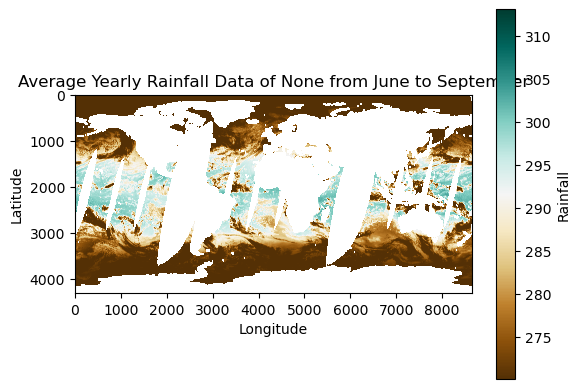

In [5]:
PlotMap(data['sea_surface_temperature'][0])

In [12]:
time_series = pd.Series(data['time'].values)

# Adjust Pandas display options to show all items without ellipsis
pd.set_option('display.max_seq_items', None)

# Now, when you print the time_series, it should show all the time values without ellipsis
print(time_series)

0     1901-06-01
1     1901-07-01
2     1901-08-01
3     1901-09-01
4     1902-06-01
         ...    
435   2009-09-01
436   2010-06-01
437   2010-07-01
438   2010-08-01
439   2010-09-01
Length: 440, dtype: datetime64[ns]


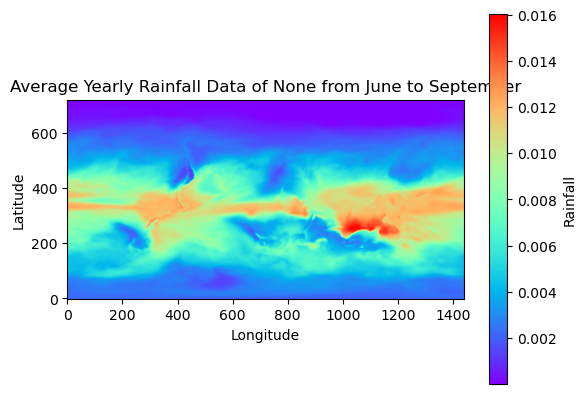

In [4]:
PlotMap(data['q'][329])

In [12]:
print(data.min())  
print(data.max())

<xarray.Dataset>
Dimensions:  ()
Data variables:
    u        float64 -19.28
<xarray.Dataset>
Dimensions:  ()
Data variables:
    u        float64 24.15


In [3]:
#Accessing the data variables sst and ssta
sst_data = data['sst']
print("\nSST Data\n",sst_data)
ssta_data = data['ssta']
print("\n\nSSTA Data\n",sst_data)



SST Data
 <xarray.DataArray 'sst' (time: 1, lev: 1, lat: 89, lon: 180)>
[16020 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lev      (lev) float64 0.0
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1901-03-01
Attributes:
    long_name:      Extended reconstructed sea surface temperature
    standard_name:  SST
    units:          degree_C
    valid_min:      -3.0
    valid_max:      45.0


SSTA Data
 <xarray.DataArray 'sst' (time: 1, lev: 1, lat: 89, lon: 180)>
[16020 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lev      (lev) float64 0.0
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1901-03-01
Attributes:
    long_name:      Extended reconstructed sea surface temperature
    standard_name: 

In [25]:
#Acessing the attributes of data variables sst & ssta
attributes_sst = sst_data.attrs
attributes_ssta = ssta_data.attrs

print("Attributes of SST\n",attributes_sst)
print("\nAttributes of SSTA\n",attributes_ssta)


Attributes of SST
 {'long_name': 'Extended reconstructed sea surface temperature', 'standard_name': 'SST', 'units': 'degree_C', 'valid_min': -3.0, 'valid_max': 45.0}

Attributes of SSTA
 {'long_name': 'Extended reconstructed SST anomalies', 'standard_name': 'SSTA', 'units': 'degree_C', 'valid_min': -12.0, 'valid_max': 12.0}


In [14]:
long_name = attributes_sst['long_name']
standard_name = attributes_sst['standard_name']
units = attributes_sst['units']
valid_min = attributes_sst['valid_min']
valid_max = attributes_sst['valid_max']
print("Attributes of SST")
print("Long Name:", long_name)
print("Standard Name:", standard_name)
print("Units:", units)
print("Valid Min:", valid_min)
print("Valid Max:", valid_max)

Attributes of SST
Long Name: Extended reconstructed sea surface temperature
Standard Name: SST
Units: degree_C
Valid Min: -3.0
Valid Max: 45.0


In [15]:
long_name = attributes_ssta['long_name']
standard_name = attributes_ssta['standard_name']
units = attributes_ssta['units']
valid_min = attributes_ssta['valid_min']
valid_max = attributes_ssta['valid_max']
print("Attributes of SSTA")
print("Long Name:", long_name)
print("Standard Name:", standard_name)
print("Units:", units)
print("Valid Min:", valid_min)
print("Valid Max:", valid_max)

Attributes of SSTA
Long Name: Extended reconstructed SST anomalies
Standard Name: SSTA
Units: degree_C
Valid Min: -12.0
Valid Max: 12.0


In [23]:
#Accessing the coordinates values
latitude_values = sst_data['lat'].values
level_values = sst_data['lev'].values
longitude_values = sst_data['lon'].values
time = sst_data['time'].values
print("Latitude values : ",latitude_values)
print("Level values : ",level_values)
print("Longitude values : ",longitude_values)
print("Time : ",time)

Latitude values :  [-88. -86. -84. -82. -80. -78. -76. -74. -72. -70. -68. -66. -64. -62.
 -60. -58. -56. -54. -52. -50. -48. -46. -44. -42. -40. -38. -36. -34.
 -32. -30. -28. -26. -24. -22. -20. -18. -16. -14. -12. -10.  -8.  -6.
  -4.  -2.   0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.
  24.  26.  28.  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.
  52.  54.  56.  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.
  80.  82.  84.  86.  88.]
Level values :  [0.]
Longitude values :  [  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.
  28.  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.
  56.  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.
  84.  86.  88.  90.  92.  94.  96.  98. 100. 102. 104. 106. 108. 110.
 112. 114. 116. 118. 120. 122. 124. 126. 128. 130. 132. 134. 136. 138.
 140. 142. 144. 146. 148. 150. 152. 154. 156. 158. 160. 162. 164. 166.
 168. 170. 172. 174. 176. 178. 180. 182. 184. 186. 188. 190. 